## Part 2: Simple Text Processing - Tokenization, Lemmatization, Word Frequency, Vectorization (20 pts)

Now we will start working on simple text processing using the `SpaCy` package and the same dataset as Part 1. The package should already be included in the `environment.yml`. However, we will also need to download `en_core_web_sm`, an English language text processing model. To do this, while having your `sotu` environment activated, run the following:

```
python -m spacy download en_core_web_sm
```

Now, you should be good to go!

Some important definitions:

- *Token*: a single word or piece of a word
- *Lemma*: the core component of a word, e.g., "complete" is the lemma for "completed" and "completely"
- *Stop Word*: a common word that does not add semantic value, such as "a", "and", "the", etc.
- *Vectorization*: representing a document as a vector where each index in the vector corresponds to a token or word and each entry is the count.

In this section, we will explore the most common tokens and lemmas throughout different slices of the speech data. We will also develop vectorization representations of the speeches. 

 The core steps are:

1. Process speeches using the SpaCy nlp module
2. Analyze Tokens vs Lemmas:
- Create a list of all tokens across all speeches that are not stop words, punctuation, or spaces.
- Create a second list of the lemmas for these same tokens.
- Display the top 25 for each of these and compare.
3. Analyze common word distributions over different years:
- Create a function that takes the dataset and a year as an input and outputs the top n lemmas for that year's speeches
- Compare the top 10 words for 2023 versus 2019
4. Document Vectorization:
- Train a Term Frequency-Inverse Document Frequency (TF-IDF) vectorization model using your processed dataset and scikit learn
- Output the feature vectors 

**Helpful Resources:**
- https://realpython.com/natural-language-processing-spacy-python/
- https://www.statology.org/text-preprocessing-feature-engineering-spacy/ 
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html# 
- https://www.geeksforgeeks.org/nlp/how-to-store-a-tfidfvectorizer-for-future-use-in-scikit-learn/ 



### Processing Speeches with SpaCy

Lets study just speeches from 2000 and onwards to begin with. So, be sure to subset your DataFrame to just these speeches before continuing!

In [1]:
import spacy
from tqdm import tqdm
from collections import Counter
import pandas as pd

sou = pd.read_csv('data/SOTU.csv')
nlp = spacy.load("en_core_web_sm")

In [2]:
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


In [3]:
# subset the speech dataframe for speeches from 2000 and onwards
sou_subset = sou[sou["Year"]>= 200]
sou_subset.Text

0      \n[Before speaking, the President presented hi...
1      \nThe President. Mr. Speaker——\n[At this point...
2      \nThe President. Thank you all very, very much...
3      \nThe President. Thank you. Thank you. Thank y...
4      \nThe President. Thank you very much. Thank yo...
                             ...                        
241    \nFellow-Citizens of the Senate and House of R...
242    \nFellow-Citizens of the Senate and House of R...
243    \nFellow-Citizens of the Senate and House of R...
244    \nFellow-Citizens of the Senate and House of R...
245    \nFellow-Citizens of the Senate and House of R...
Name: Text, Length: 246, dtype: object

In [6]:
# Process each speeches using the 'nlp' function
# Hint - loop through each speech and pass the text into the nlp function above, storing the output in a list
processed_speeches = []

for idx, speech in sou_subset.iterrows():
    speech_text = speech["Text"]
    processed = nlp(speech_text)
    processed_speeches.append(processed)
    
# should take about 30 seconds to process

### Analyze Tokens vs Lemmas

#### Token List

Create a list of tokens across all speeches that are not spaces, stopwords, or punctuation. Make each token lowercase as well. *Hint: each element of the list we just created are themselves lists of tokens. Token objects have attributes `is_stop`, `is_punct`, and `is_space`.*

In [26]:
tokens = []

for speech in processed_speeches:
    for token in speech:
        if not token.is_punct and not token.is_space and not token.is_stop:
            tokens.append(token.text)
    

In [27]:
# print top 20 tokens
# Hint - use Counter, and one of the Counter object's methods to display the top 20
token_count = Counter(tokens).most_common(20)
print(token_count)

[('States', 6662), ('Government', 5811), ('Congress', 5364), ('United', 4958), ('people', 4408), ('year', 4360), ('$', 4074), ('country', 3716), ('public', 3289), ('time', 3109), ('American', 2998), ('great', 2862), ('new', 2759), ('years', 2612), ('world', 2576), ('war', 2287), ('law', 2284), ('present', 2218), ('America', 2124), ('power', 2039)]


#### Lemma List

Do the same as above, but for lemmas. *Hint: recall lemmas are components of words. Each token should have an attribute to extract the lemma.*

In [ ]:
lemmas = []

for token in tokens:
    word = nlp(token) # run the tokens through nlp to make sure it has the lemma_ attribute
    for token in word:
        lemma=token.lemma_
        lemmas.append(lemma.lower())

#### Token versus Lemma Comparison

What do you notice about the top tokens versus the top lemmas? 
Consider two tokens - "year" and "years" - how do their counts compare to the lemma "year"?
What about the lemma "child"?

### Common Words

#### Common Words per Year Function

Fill in the below function to obtain the n-most common words in speeches for a given year.

inputs: 
- df raw unprocessed sou dataframe
- year
- n
outputs: 
- top n words for that years

steps:
- subset the dataframe for the year of interest - note the years might not be in int type
- process the subsetted dataframe with spacy
- get the lemmas across all those speeches
- count the top n lemmas

In [42]:
def get_most_common_words(df, year, n=25):
    """
    Processes the SOTU speech for a given year and returns
    the most common non-stopword/punctuation lemmas.
    """

    # Step 1: Subset df

    # Step 2: Process the text with spaCy
    
    # Step 3: Get lemmas
    
    return ...

In [35]:
# test it on 2024

100%|██████████| 1/1 [00:01<00:00,  1.40s/it]


[('president', 58),
 ('year', 45),
 ('america', 44),
 ('american', 34),
 ('people', 33),
 ('$', 33),
 ('member', 32),
 ('want', 29),
 ('audience', 29),
 ('know', 29)]

#### Compare 2023 to 2017

Run your function from the previous step to get the top 20 words for 2017 and 2023. Plot the words and their frequencies in a barchart and replicate the figure below.

In [36]:
words_2023 = ...
words_2017 = ...

100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


In [37]:
words_2023

[('year', 58),
 ('go', 56),
 ('let', 45),
 ('know', 40),
 ('people', 39),
 ('job', 38),
 ('america', 36),
 ('come', 33),
 ('law', 33),
 ('pay', 33),
 ('american', 31),
 ('$', 31),
 ('president', 30),
 ('look', 27),
 ('world', 25),
 ('folk', 24),
 ('nation', 24),
 ('audience', 23),
 ('work', 23),
 ('right', 23)]

In [38]:
words_2017

[('american', 34),
 ('america', 29),
 ('country', 26),
 ('nation', 21),
 ('great', 20),
 ('new', 19),
 ('year', 19),
 ('world', 18),
 ('job', 15),
 ('people', 15),
 ('americans', 14),
 ('united', 13),
 ('tonight', 13),
 ('states', 12),
 ('work', 12),
 ('child', 12),
 ('want', 12),
 ('time', 12),
 ('citizen', 11),
 ('right', 11)]

In [43]:
# Hint - put the words and counts into a pd Dataframe for better structure
# and to make plotting easier
df_2017 = ...
df_2023 = ...

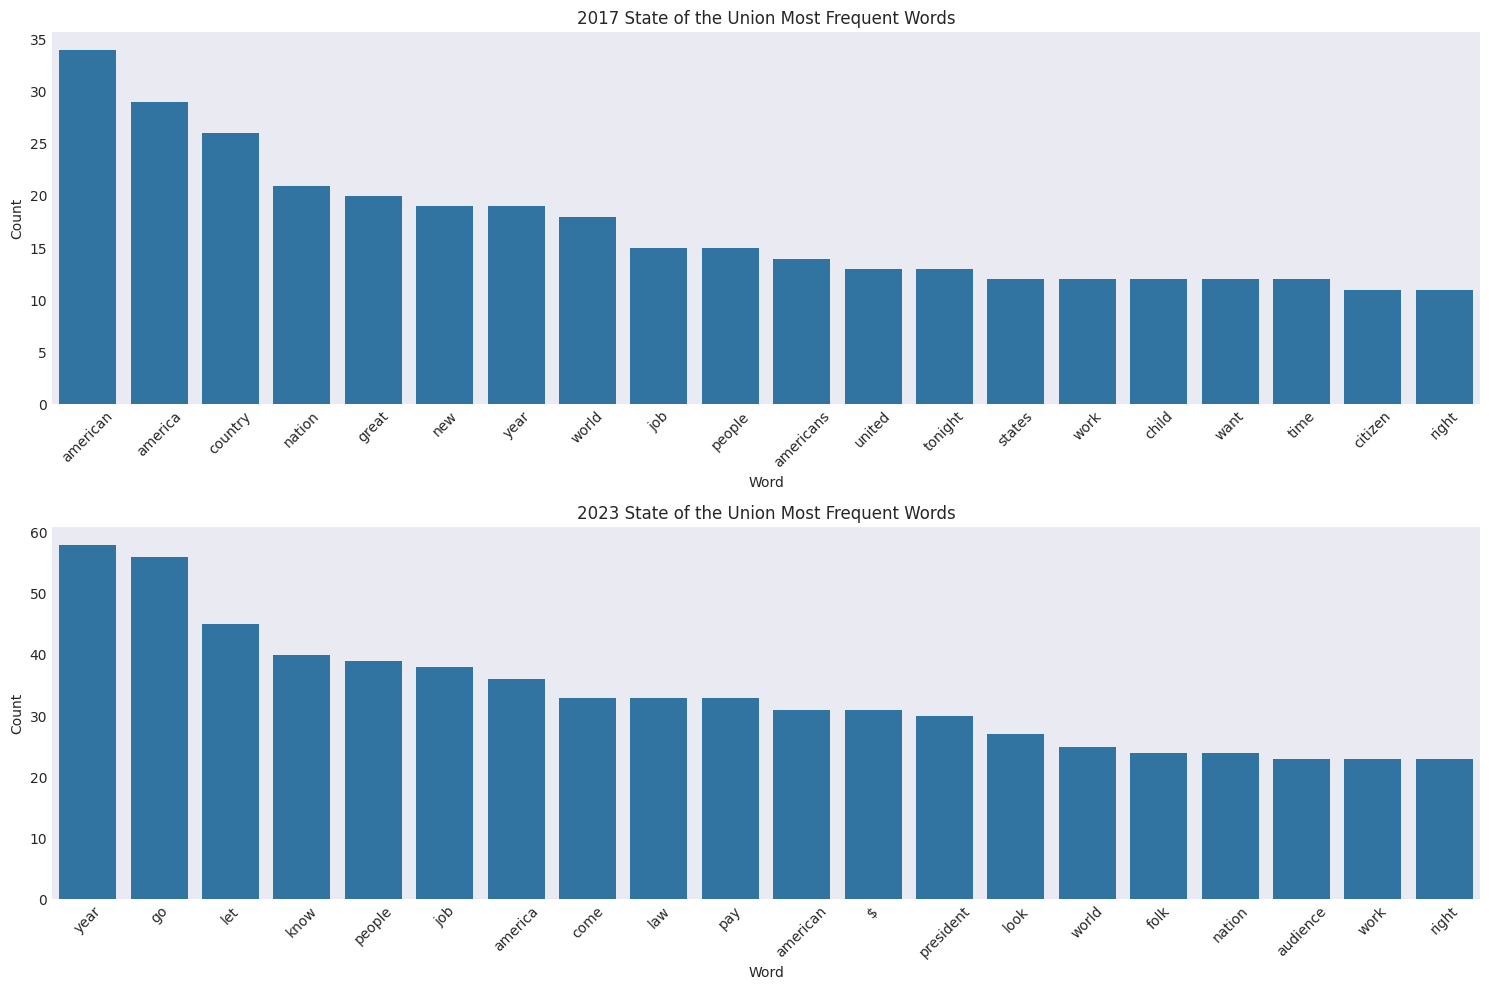

In [44]:
# Hint - use seaborn, subplots, and rotate tick labels

### TF-IDF Vectorization

To use statsitical alorithms on documents, we need to transform them into vectors, where each element of the vector corresponds to a particular word in a document or corpus of documents. One common way is via TF-IDF embeddings. LLMs work similarly - they typically use transformer models to generate text embeddings before sending text through a deep neural network. 

Here we will fit a TF-IDF vectorizer, plot all the speeches on a 2-D grid using PCA and also using a heatmap, and examine TF-IDF scores for the top 10 most common words in the first speech. This is a good resource here: https://medium.com/GeoffreyGordonAshbrook/vector-visualization-2d-plot-your-tf-idf-with-pca-83fa9fccb1d 

In [9]:
# Install only once, can do from terminal
# install nltk in the current kernel
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "nltk"])

# confirm the version that was just installed
import nltk
print("NLTK version:", nltk.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.1 MB/s  0:00:00
NLTK version: 3.9.2


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.tokenize.casual import casual_tokenize

#### Train the Vectorizer and Transform the Data

In [3]:
# you may use this as input to fit the TF-IDF vectorizer
raw_docs = sou["Text"].to_list()

In [4]:
##########################
# Minimal TF-IDF Vectors (Reference: Vector Visualization by Ashbrook)
##########################

# Select Model
tfidf_model = TfidfVectorizer()

# Fit Model
tfidf_vectors = tfidf_model.fit_transform(raw_docs).toarray()

The output of `fit_transform()` will be a matrix where each row corresponds to a speech, each column corresponds to a word in the corpus of speeches, and the value is the TF-IDF score which measures the importance of that word in that speech, relative to the rest of the speeches.

#### Plot Speeches

- First used PCA to generate the first chart
- Second use seaborn heatmap with a log-scaled color axis to generate the second chart

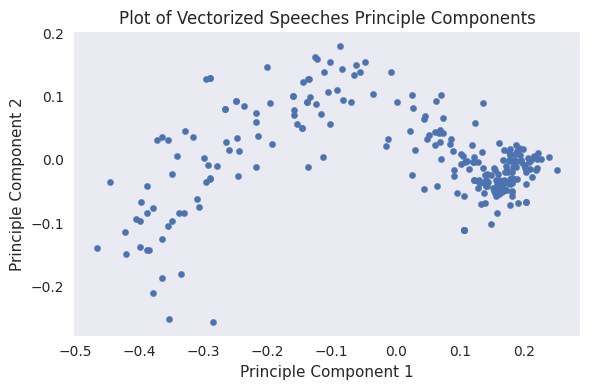

In [14]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
# Step 1: Set PCA to find first 2 principal components
pca = PCA(n_components=2)

# Step 2: Create a new dataframe where each row is a speech, and each column is a projection onto
# one of the two principal components
speeches_array = tfidf_vectors
speeches_df2d = pd.DataFrame(pca.fit_transform(speeches_array), columns=list('xy'))

# Plot Data Visualization (Matplotlib)

# Plot (matplotlib only)
plt.style.use('seaborn-v0_8')           # just a style; still matplotlibplt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.scatter(speeches_df2d['x'], speeches_df2d['y'], s=20)
plt.xlabel('Principle Component 1'); plt.ylabel('Principle Component 2'); plt.title('Plot of Vectorized Speeches Principle Components')
plt.grid(False)
plt.tight_layout(); plt.show()


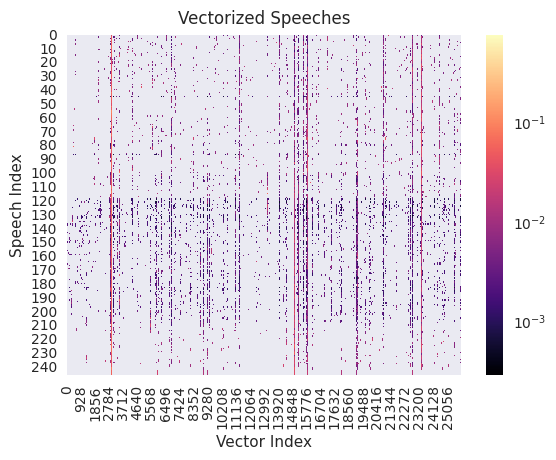

In [16]:
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm
import matplotlib.ticker as mticker
from matplotlib.ticker import FixedLocator, FixedFormatter

# vectorized_docs: scipy sparse matrix (rows=speeches, cols=tokens)
A = tfidf_vectors.astype(np.float32)   # densify

# Log scale needs vmin > 0; pick the smallest positive value
pos_min = A[A > 0].min() if (A > 0).any() else 1e-6

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(5.8, 4.7))

ax = sns.heatmap(
    A,
    cmap="magma",
    norm=LogNorm(vmin=pos_min, vmax=A.max()),
    cbar_kws={"format": mticker.LogFormatterMathtext()}
)

ax.set_title("Vectorized Speeches", pad=8)
ax.set_xlabel("Vector Index")
ax.set_ylabel("Speech Index")

n_cols = A.shape[1]
step = 928         
xticks = np.arange(0, n_cols, step)

ax.xaxis.set_major_locator(FixedLocator(xticks))
ax.xaxis.set_major_formatter(FixedFormatter([str(v) for v in xticks]))
plt.setp(ax.get_xticklabels(), rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

#### Get the TF-IDF value for certain words and documents

In [18]:
word_list = ['year',
 'america',
 'people',
 'american',
 'work',
 'new',
 'job',
 'country',
 'americans',
 'world'] # top ten most common words through whole corpus

In [19]:
word_nums = [tfidf_model.vocabulary_[w] for w in word_list] # get each word's index number using the .vocabular_ attributed of vectorizer

In [20]:
idf_score = tfidf_model.idf_[word_nums] # get their IDF score by using .idf_ at the indices from the previous step

In [21]:
tf_idf = tfidf_vectors[0, word_nums] # get the tf_idf score for the first speech

In [22]:
pd.DataFrame({"Word": word_list, "IDF Score": idf_score, "TF-IDF Score": tf_idf})

,Word,IDF Score,TF-IDF Score
0,year,1.032925,0.022719
1,america,1.272946,0.068439
2,people,1.037118,0.043087
3,american,1.102217,0.045792
4,work,1.162281,0.005681
5,new,1.024591,0.016275
6,job,2.043480,0.009988
7,country,1.008130,0.013550
8,americans,1.713598,0.041877
9,world,1.138750,0.026438
